<h1>Attendance Predictor for The Berkeley Forum</h1>

Thourough investigation of the correlation between the Twitter followers of a speaker and his or her associated institution against the attedance of an event was conducted. We concluded that There was only weak correlation between the social media following of a speaker and turnout at events, possibly due to the limited scope of our data.

In [131]:
%matplotlib notebook

import numpy as np
from sklearn import linear_model as sklearn
import pandas as pd
import math
from matplotlib import pyplot as plt

In [111]:
df = pd.read_csv("Attendance Predictor Data - events_model.csv")
df

,Event Name,Quantity,Attendee Status,Speaker Twitter Followers,Institution Twitter Followers
0,14th Librarian of Congress Dr. Carla Hayden at...,185,0.529730,46200.0,1070000
1,ACLU President Susan Herman at the Berkeley Forum,108,0.259259,772.0,1330000
2,"Activism in Berkeley, Then and Now: Mayor of B...",27,0.074074,1521.0,7248
3,Animal Rights Legal Scholar Steven Wise at the...,62,0.467742,NaN,NaN
4,Artistic Director of the American Conservatory...,52,0.230769,465.0,8429
5,Assistant Professor at the Middlebury Institut...,94,0.244681,129.0,8075
6,"Associate Professor and Associate Dean, Goldma...",56,0.321429,622.0,2825
7,Bharata Natyam Classical Dancer Mythili Prakas...,25,0.720000,NaN,NaN
8,CEO and Co-Founder of FiscalNote Timothy Hwang...,53,0.264151,355.0,4409
9,CEO at Women Who Code Alaina Percival at the B...,69,0.304348,4356.0,150000


In [124]:
#plotted data and determined the outliers
outliers = [41,78]

[973, 933]

In [125]:
attendance, percent, person, inst = [],[],[],[]

for i in range(df.shape[0]):
    if i in outliers:
        continue
    p_inst = df['Speaker Twitter Followers'][i]
    i_inst = df['Institution Twitter Followers'][i]
    
    if type(p_inst) == str:
        p_inst = int(p_inst.replace(',', ''))
    if type(i_inst) == str:
        i_inst = int(i_inst.replace(',', ''))
    
    if not math.isnan(p_inst) or not math.isnan(i_inst):
        if math.isnan(p_inst):
            p_inst = 0
        elif math.isnan(i_inst):
            i_inst = 0
        attendance.append(df['Quantity'][i])
        percent.append(df['Attendee Status'][i])
        person.append(p_inst)
        inst.append(i_inst)


In [118]:
log_person = np.log(np.add(person, np.ones(len(person))))
log_inst = np.log(np.add(inst, np.ones(len(inst))))

In [182]:
in_array = np.transpose(np.vstack((log_person, log_inst)))

In [186]:
in_train = in_array[:50]
in_test = in_array[50:]
attendance_train = attendance[:50]
attendance_test = attendance[50:]

reg = sklearn.LinearRegression()
reg.fit(in_train, attendance_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [190]:
reg.score(in_test, attendance_test)

-0.045459130185100838

<IPython.core.display.Javascript object>


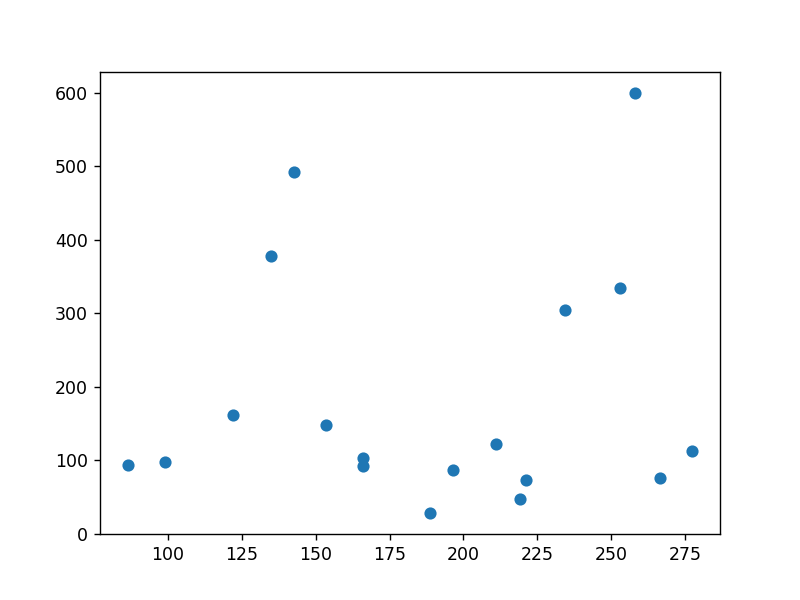

In [192]:
plt.close()
plt.scatter(pred_test, attendance_test)
plt.show()

As we can see correlation is weak on the test data, so this model has only limited success.

<b>Predictive model</b>

In [194]:
coef = reg.coef_
## set the model inputs
person_in = 1000
inst_in = 10000

prediction = coef[0]*np.log(person_in)+coef[1]*np.log(inst_in)
print (prediction)

179.290997469
